Dans ce projet, j'étudie la détéction de fraude de carte de crédit. 

Ce projet est important parce qu'il permet aux entreprises de rester fidèles à leurs valeurs éthiques et morales et permet aux autres utilisateurs de ne pas souffrir des répercussions du comportemen des personnes frauduleuses. 
Le but du projet est d’étudier ces données en Machine Learning et essayer de trouver des corrélations entre les données cryptés et la nature de la transaction. 

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from plotly.figure_factory import create_distplot
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb


In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0] 

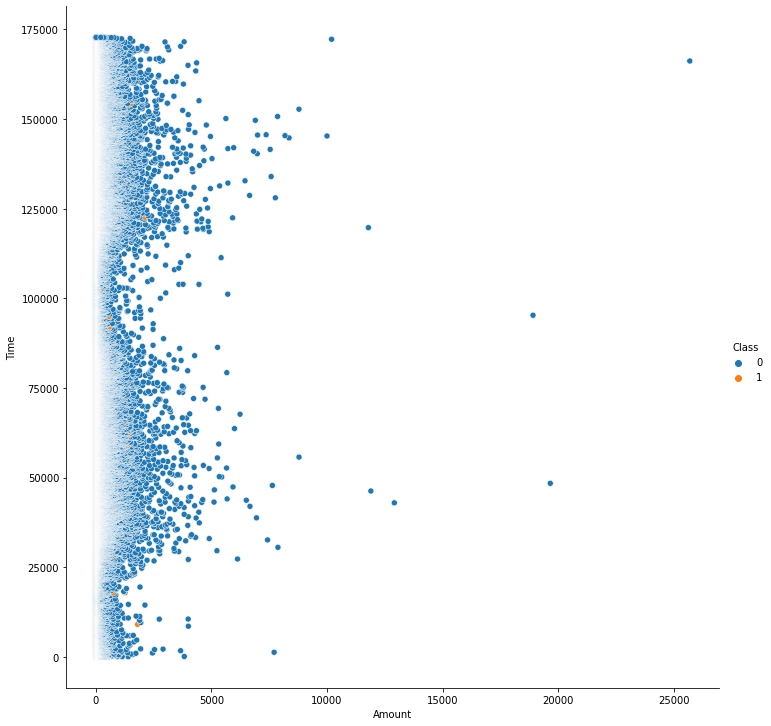

In [ ]:
sns.relplot(x='Amount',y='Time',hue='Class',data = data,height=10)

In [ ]:
class_0 = data.loc[data['Class']==0]["Time"]
class_1 = data.loc[data['Class']==1]["Time"]
hist_data = [class_0,class_1]
group_labels= ['Not Fraud', 'Fraud']

In [ ]:
fig = create_distplot(hist_data, group_labels,show_hist=False,show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot',xaxis=dict(title = 'Time [s]'))
fig.show()

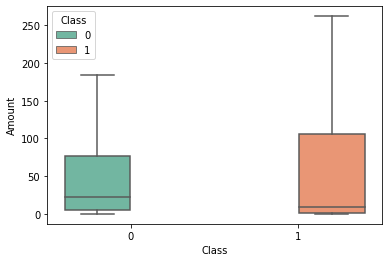

In [ ]:
fig = sns.boxplot(x="Class", y="Amount",showfliers=False, hue="Class",palette="Set2", data=data)

In [ ]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fig = px.scatter(data, x=fraud['Time'], y=fraud['Amount'],)
fig['layout'].update(title='Amount of fraudulent transactions',
                     xaxis=dict(title = 'Time [s]'),
                     yaxis=dict(title = 'Amount'))
fig.show()

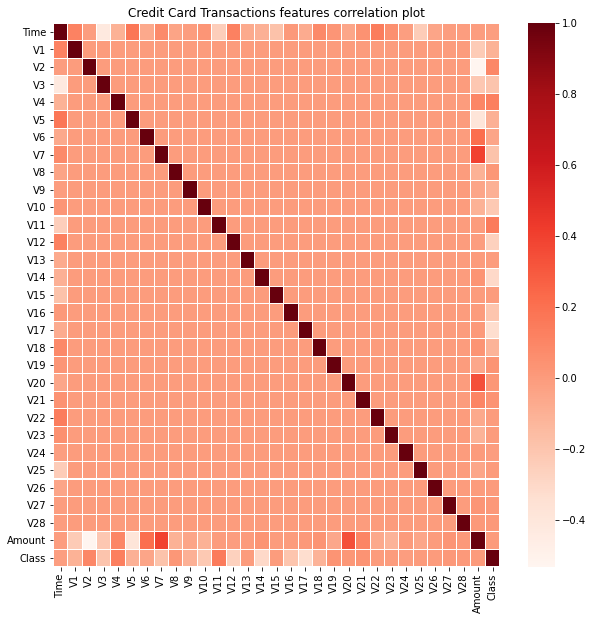

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Credit Card Transactions features correlation plot')
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
target =['Class']
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']

In [ ]:
train_df, test_df = train_test_split(data,test_size=0.20,random_state=42,shuffle = True)
train_df, valid_df = train_test_split(data,test_size=0.20,random_state=42,shuffle = True)

In [ ]:
valid_df.describe()

In [ ]:
train_df.describe()

# RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(train_df[predictors],train_df['Class'].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf.predict(valid_df[predictors])

<function matplotlib.pyplot.show>

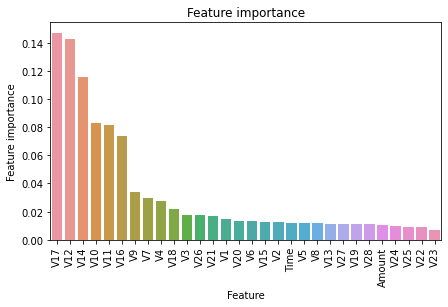

In [ ]:
tmp = pd.DataFrame({'Feature': predictors,'Feature importance':clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize=(7,4))
plt.title('Feature importance')
s = sns.barplot(x='Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show

<function matplotlib.pyplot.show>

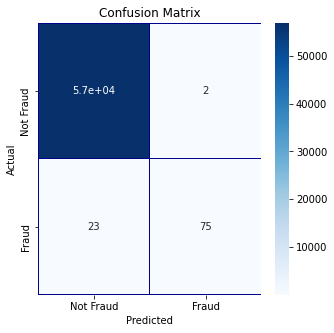

In [ ]:
cn = pd.crosstab(valid_df['Class'].values, preds, rownames = ['Actual'],colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cn,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True, ax=ax1,
            linewidths = .2, linecolor="Darkblue",cmap="Blues")
plt.title('Confusion Matrix')
plt.show

In [ ]:
roc_auc_score(valid_df['Class'].values, preds)

0.8826354754056941

# AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.8)

In [ ]:
clf.fit(train_df[predictors],train_df['Class'].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=None)

In [ ]:
preds = clf.predict(valid_df[predictors])

<function matplotlib.pyplot.show>

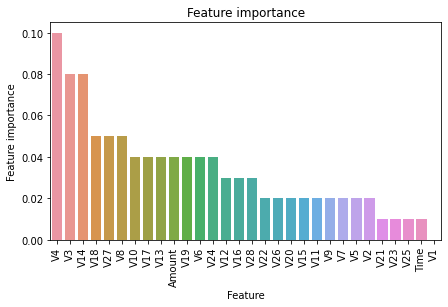

In [ ]:
tmp = pd.DataFrame({'Feature': predictors,'Feature importance':clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize=(7,4))
plt.title('Feature importance')
s = sns.barplot(x='Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show

<function matplotlib.pyplot.show>

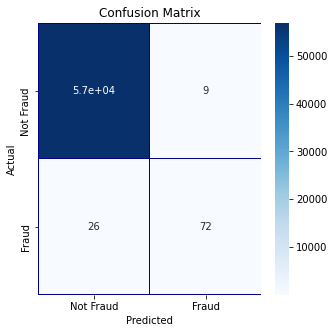

In [ ]:
cn = pd.crosstab(valid_df['Class'].values, preds, rownames = ['Actual'],colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cn,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True, ax=ax1,
            linewidths = .2, linecolor="Darkblue",cmap="Blues")
plt.title('Confusion Matrix')
plt.show

In [ ]:
roc_auc_score(valid_df['Class'].values,preds)

0.8672678025909294

# XGBoost

In [ ]:
dtrain = xgb.DMatrix(train_df[predictors],train_df['Class'].values)
dvalid = xgb.DMatrix(valid_df[predictors],valid_df['Class'].values)
dtest = xgb.DMatrix(test_df[predictors],test_df['Class'].values)

watchlist = [(dtrain, 'train'),(dvalid,'valid')]
MAX_ROUNDS = 1000
EARLY_STOP = 50
VERBOSE_EVAL = 50

params = {'objective':'binary:logistic',
          'eta' : 0.039,
          'silent' : True,
          'max_depth':2,
          'subsample':0.8,
          'colsample_bytee':0.9,
          'eval_metric':'auc',
          'random_state':0.2}

In [ ]:
model = xgb.train(params,
                  dtrain,
                  MAX_ROUNDS,
                  watchlist,
                  early_stopping_rounds=EARLY_STOP,
                  maximize=True,
                  verbose_eval = VERBOSE_EVAL)

[0]	train-auc:0.880558	valid-auc:0.86205
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.921108	valid-auc:0.928335
[100]	train-auc:0.935409	valid-auc:0.937719
[150]	train-auc:0.974892	valid-auc:0.960607
[200]	train-auc:0.988711	valid-auc:0.976508
[250]	train-auc:0.991267	valid-auc:0.977062
[300]	train-auc:0.993726	valid-auc:0.979096
[350]	train-auc:0.99522	valid-auc:0.981908
[400]	train-auc:0.996244	valid-auc:0.983347
[450]	train-auc:0.997051	valid-auc:0.983514
[500]	train-auc:0.997648	valid-auc:0.983995
[550]	train-auc:0.998112	valid-auc:0.984708
[600]	train-auc:0.998511	valid-auc:0.985641
[650]	train-auc:0.998795	valid-auc:0.985182
Stopping. Best iteration:
[603]	train-auc:0.998495	valid-auc:0.985784



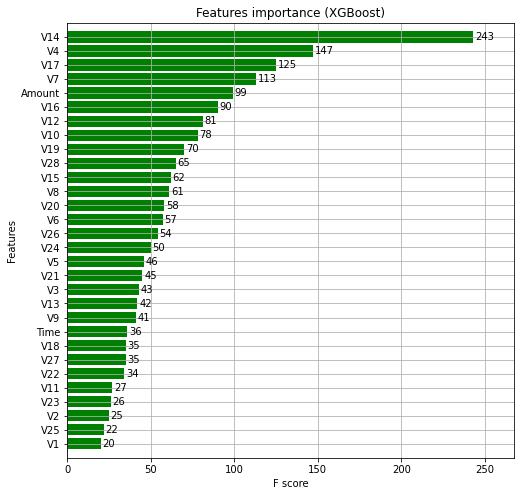

In [ ]:
fig,(ax) = plt.subplots(ncols=1,figsize=(8,8))
xgb.plot_importance(model,height=0.8,title="Features importance (XGBoost)", ax=ax,color="green")
plt.show()

In [ ]:
preds = model.predict(dtest)

In [ ]:
roc_auc_score(test_df['Class'].values,preds)

0.9852340134140318

# LightGBM

In [ ]:
params = {
          'boosting_type':'gbdt',
          'objective':'binary',
          'metric':'auc',
          'learning_rate':0.05,
          'num_leaves': 7,
          'max_depth':4,
          'min_child_samples':100,
          'max_bin':100,
          'subsample':0.9,
          'subsample_freq':1,
          'colsample_bytee':0.7,
          'min_child_weight':0,
          'min_splitègain':0,
          'nthread':8,
          'verbose':0,
          'scale_pos_weight':150}

In [ ]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df['Class'].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df['Class'].values,
                     feature_name=predictors)

In [ ]:
evals_results = {}

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain,dvalid],
                  valid_names=['train','valid'],
                  evals_result=evals_results,
                  num_boost_round = MAX_ROUNDS,
                  early_stopping_rounds = 2*EARLY_STOP,
                  verbose_eval= VERBOSE_EVAL,
                  feval = None)

Training until validation scores don't improve for 100 rounds.
[50]	train's auc: 0.988404	valid's auc: 0.96791
[100]	train's auc: 0.992817	valid's auc: 0.963957
[150]	train's auc: 0.993352	valid's auc: 0.95527
Early stopping, best iteration is:
[79]	train's auc: 0.991929	valid's auc: 0.972502


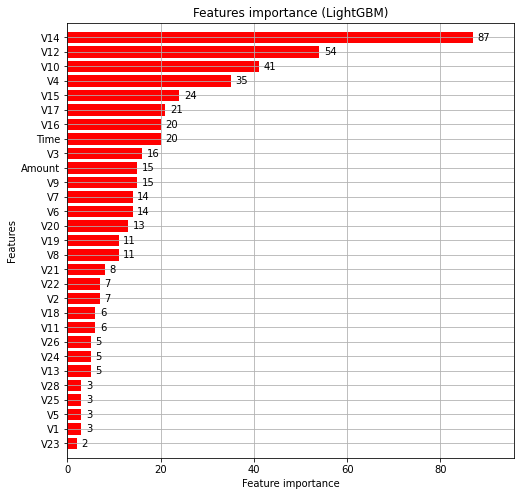

In [ ]:
fig,(ax) = plt.subplots(ncols=1,figsize=(8,8))
lgb.plot_importance(model,height=0.8,title="Features importance (LightGBM)", ax=ax,color="red")
plt.show()

In [ ]:
preds = model.predict(test_df[predictors])

In [ ]:
roc_auc_score(test_df['Class'].values, preds)

0.9727532860358549

Source and credits : 
- https://www.kaggle.com/mlg-ulb/creditcardfraud
- https://www.youtube.com/watch?v=frM_7UMD_-A&t=68s
- https://www.youtube.com/watch?v=gCWBFyFTxVU
- https://www.youtube.com/watch?v=zCEc64VyZnU&ab_channel=AiWorks